In [20]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [43]:
DATA = "_data/synthetic_leaf_instances/train"

In [44]:
files = os.listdir(os.path.join(DATA, "images"))
file = files[0]

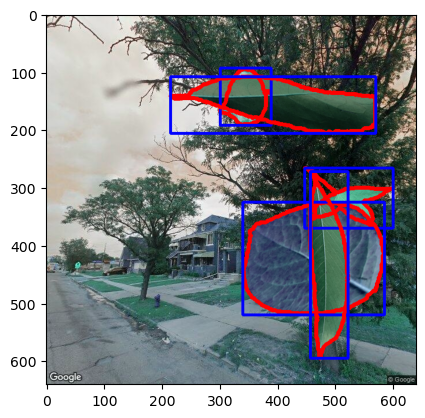

In [59]:
image_file = os.path.join(DATA, "images", file)
label_file = os.path.join(DATA, "labels", os.path.splitext(file)[0] + ".txt")

img = cv2.imread(image_file)

height, width = img.shape[:2]

with open(label_file) as f:
    label_data = f.read()
label_data = label_data.split('\n')

for label_datum in label_data:
    data = label_datum.split(' ')
    class_id = data[0]
    bbox = data[1:5]
    segmentation = data[5:]
    contours = np.array(segmentation).astype(np.float32).reshape(-1, 2)
    contours = contours * [width, height]
    contours = contours.reshape(-1, 1, 2).astype(np.int32)
    cv2.drawContours(img, [contours], -1, (255, 0, 0), 5)
    box = np.array(bbox).astype(np.float32)
    if len(box) == 0:
        continue
    start = (int(box[0] * width), int(box[1] * height))
    end = (int((box[0] + box[2]) * width), int((box[1] + box[3]) * height))
    img = cv2.rectangle(img, start, end, (0, 0, 255), 3)
plt.imshow(img)